In [16]:
import pandas as pd
import numpy as np
#from dateutil import parser
#import seaborn as sns
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
#from tcn import TCN
from tensorflow.keras.layers import Dense

In [3]:
flie_path = 'train15.csv'

In [4]:
df = pd.read_csv(flie_path)
df.shape

(9017, 33)

In [5]:
df.head()


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [6]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [8]:
df1 = df.drop(['STATE/UT','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', 'CUSTODIAL RAPE','OTHER RAPE','COUNTERFIETING','OTHER IPC CRIMES','TOTAL IPC CRIMES', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS',  'AUTO THEFT','OTHER THEFT','PREPARATION AND ASSEMBLY FOR DACOITY','BURGLARY','RIOTS','CRIMINAL BREACH OF TRUST','DACOITY','CHEATING','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','HURT/GREVIOUS HURT' ], axis=1)
df1

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,ARSON,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE
0,ADILABAD,2001,101,60,50,46,41,199,30,16,181
1,ANANTAPUR,2001,151,125,23,53,16,366,69,7,270
2,CHITTOOR,2001,101,57,27,59,14,723,38,14,404
3,CUDDAPAH,2001,80,53,20,25,4,173,23,17,233
4,EAST GODAVARI,2001,82,67,23,49,25,1021,41,12,431
...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,2012,0,0,0,0,0,7,3,0,0
9013,TOTAL,2012,0,0,0,0,0,7,3,0,0
9014,KARAIKAL,2012,5,6,6,2,3,81,1,0,44
9015,PUDUCHERRY,2012,24,21,7,17,13,577,20,0,219


In [9]:
df1.shape

(9017, 11)

In [10]:
data_without_year = df1.drop(['YEAR','DISTRICT'],axis=1) 
describe = data_without_year.describe()
describe


,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,ARSON,DOWRY DEATHS,CAUSING DEATH BY NEGLIGENCE
count,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,89.28535,78.069646,53.041366,79.152046,55.066430,776.428968,25.219918,20.228901,222.216702
std,327.27503,303.446020,190.741450,317.630964,220.576876,2935.008640,98.880282,96.970466,936.002540
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.00000,10.000000,8.000000,10.000000,6.000000,88.000000,2.000000,1.000000,5.000000
50%,38.00000,28.000000,20.000000,25.000000,17.000000,217.000000,8.000000,5.000000,68.000000
75%,66.00000,56.000000,41.000000,56.000000,37.000000,466.000000,20.000000,16.000000,177.000000
max,7601.00000,7964.000000,3425.000000,8878.000000,6949.000000,53449.000000,2830.000000,2322.000000,16076.000000


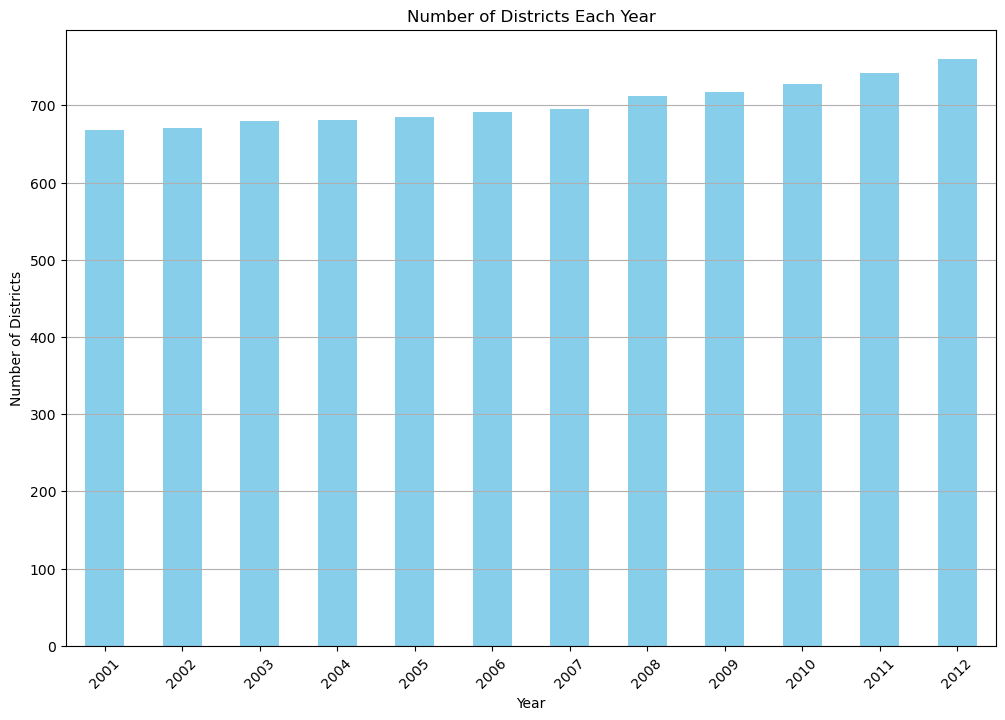

In [21]:

# Groups the data by year
grouped_data = df1.groupby('YEAR')

# Counts the number of unique districts for each year
district_counts = grouped_data['DISTRICT'].nunique()

# Checks if the number of districts is consistent across all years
consistent_districts = district_counts.nunique() == 1


plt.figure(figsize=(12, 8))
district_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Districts Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Districts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()





In [12]:
# Determines districts with data for all years from 2001 to 2012
districts_with_complete_data = df1.groupby('DISTRICT')['YEAR'].nunique() == 12
districts_with_complete_data = districts_with_complete_data[districts_with_complete_data].index.tolist()

# Filters the dataset to include only districts with complete data
df_filtered = df1[df1['DISTRICT'].isin(districts_with_complete_data)]


 # Removes total from the dataset
df_filtered.drop(df_filtered[df_filtered['DISTRICT'] == 'TOTAL'].index, inplace=True)


C:\Users\aashi\AppData\Local\Temp\ipykernel_9964\3359522422.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(df_filtered[df_filtered['DISTRICT'] == 'TOTAL'].index, inplace=True)


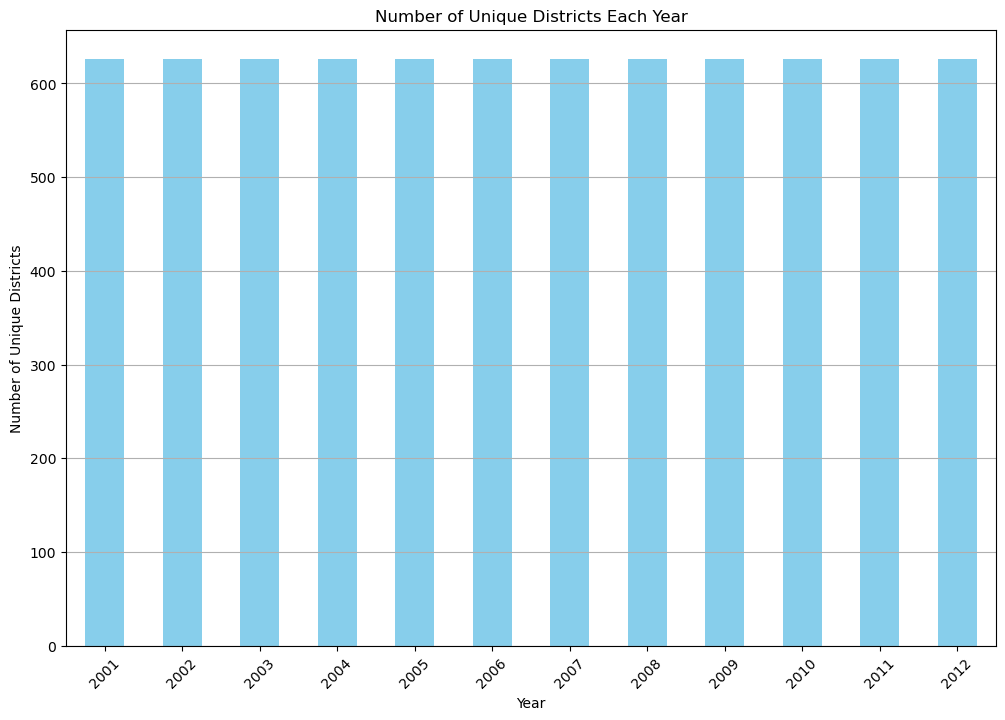

In [13]:

# Groups the data by year
grouped_data = df_filtered.groupby('YEAR')

# Counts the number of unique districts for each year
district_counts = grouped_data['DISTRICT'].nunique()

# Checks if the number of districts is consistent across all years
consistent_districts = district_counts.nunique() == 1

plt.figure(figsize=(12, 8))
district_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Districts Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Districts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



In [25]:
selected_districts = df['DISTRICT'].unique()[:20]

In [26]:
# Initializes a dictionary to store predictions for each district and each crime type
predictions_per_district = {}


# Iterates over each district
for district in selected_districts:
    print(f'Predicting for {district}...')

    # Filters the data for the current district
    df_district = df_filtered[df_filtered['DISTRICT'] == district].reset_index(drop=True)

    # Extracts features (excluding district, year)
    X = df_district.drop(columns=['DISTRICT', 'YEAR'])

    # Gets a list of crime types
    crime_types = X.columns

    # Initializes a dictionary to store predictions for the current district
    predictions_per_crime_type = {}

    # Iterates over each crime type
    for crime_type in crime_types:
        # Extracts the target variable (number of crimes for the current crime type)
        y = df_district[crime_type].reset_index(drop=True)

        # Splits the data into training data (2001-2011) and testing data (2012)
        X_train = X[(df_district['YEAR'] <= 2011)].reset_index(drop=True)
        y_train = y[(df_district['YEAR'] <= 2011)]
        X_test = X[(df_district['YEAR'] == 2012)].reset_index(drop=True)

        # Checks if there is at least one sample in X_test
        if X_test.shape[0] > 0:
            # Normalizes the data
            scaler_X = MinMaxScaler()
            X_train_scaled = scaler_X.fit_transform(X_train)
            X_test_scaled = scaler_X.transform(X_test)

            # Reshapes X_train and X_test to include the n_timesteps dimension
            n_timesteps = 1
            n_features = X_train_scaled.shape[1]
            X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], n_timesteps, n_features)
            X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], n_timesteps, n_features)

            # Defines the LSTM model
            model = Sequential([
                LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
                Dense(64, activation='relu'),
                Dense(32, activation='relu'),
                Dense(1)
                
            
            ])

            # Compiles the model
            model.compile(optimizer='adam', loss='mse')

            # Trains the model using the training data
            model.fit(X_train_scaled, y_train, epochs=1400,  verbose=0)

            # Makes predictions for 2012
            predictions = model.predict(X_test_scaled)
            
            #Rounds the predicited value
            predictions_rounded = np.round(predictions)

            # Stores the predictions for the current crime type
            predictions_per_crime_type[crime_type] = predictions_rounded

    # Stores the predictions for the current district
    predictions_per_district[district] = predictions_per_crime_type

# predictions_per_district now contains the predicted number of crimes for each crime type and each district in 2012


Predicting for ADILABAD...



1/1 [==============================] - 0s 487ms/step
Predicting for ANANTAPUR...
1/1 [==============================] - 1s 522ms/step
Predicting for CHITTOOR...
1/1 [==============================] - 0s 461ms/step
Predicting for CUDDAPAH...
1/1 [==============================] - 0s 466ms/step
Predicting for EAST GODAVARI...
1/1 [==============================] - 0s 467ms/step
Predicting for GUNTAKAL RLY....
1/1 [==============================] - 0s 203ms/step
Predicting for GUNTUR...
1/1 [==============================] - 0s 456ms/step
Predicting for HYDERABAD CITY...
1/1 [==============================] - 0s 476ms/step
Predicting for KARIMNAGAR...
1/1 [==============================] - 0s 470ms/step
Predicting for KHAMMAM...
1/1 [==============================] - 1s 525ms/step
Predicting for KRISHNA...
1/1 [==============================] - 0s 175ms/step
Predicting for KURNOOL...
1/1 [==============================] - 0s 183ms/step
Predicting for MAHABOOB

1/1 [==============================] - 0s 188ms/step
Predicting for MEDAK...
1/1 [==============================] - 0s 214ms/step
Predicting for NALGONDA...
1/1 [==============================] - 0s 239ms/step
Predicting for NELLORE...
1/1 [==============================] - 0s 192ms/step
Predicting for NIZAMABAD...
1/1 [==============================] - 0s 196ms/step
Predicting for PRAKASHAM...
1/1 [==============================] - 0s 231ms/step
Predicting for RANGA REDDY...
1/1 [==============================] - 0s 196ms/step
Predicting for SECUNDERABAD RLY....
1/1 [==============================] - 0s 256ms/step


In [27]:

model.summary()

Model: "sequential_179"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_179 (LSTM)             (None, 50)                12000     
                                                                 
 dense_537 (Dense)           (None, 64)                3264      
                                                                 
 dense_538 (Dense)           (None, 32)                2080      
                                                                 
 dense_539 (Dense)           (None, 1)                 33        
                                                                 
Total params: 17377 (67.88 KB)
Trainable params: 17377 (67.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Initializes lists to store true values and predicted values
true_values = []
predicted_values = []

# Iterates over each district and crime type
for district, predictions_per_crime_type in predictions_per_district.items():
    for crime_type, predictions in predictions_per_crime_type.items():
        # Extracts the true values for the current crime type
        y_true = df_filtered[(df_filtered['DISTRICT'] == district) & (df_filtered['YEAR'] == 2012)][crime_type].values
        true_values.extend(y_true)
        
        # Appends the predicted values (rounded to integers)
        predicted_values.extend(np.round(predictions))

# Calculates evaluation metrics
mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 10.4
Mean Squared Error: 541.6444444444444
Root Mean Squared Error: 23.27325599146893


In [29]:
from tabulate import tabulate


for district, predictions_per_crime_type in predictions_per_district.items():
    print(f'Predictions for {district}:')
    headers = ['Crime Type', 'Actual Value', 'Predicted Value']
    rows = []
    for crime_type, predictions in predictions_per_crime_type.items():
        actual_value = df_filtered[(df_filtered['DISTRICT'] == district) & (df_filtered['YEAR'] == 2012)][crime_type].values  # Get actual value from your data
        predicted_value = predictions[0]  # Assuming there's only one prediction per crime type
        rows.append([crime_type, actual_value, predicted_value])
    print(tabulate(rows, headers=headers, tablefmt='grid'))
    print()  # Add an empty line between districts


Predictions for ADILABAD:
+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             81 |                83 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             80 |                74 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             88 |                89 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             82 |                76 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             14 |                13 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            373 |               383 |
+-------

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |              4 |                 8 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              0 |                 0 |
+-----------------------------+----------------+-------------------+
| RAPE                        |              2 |                 2 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              0 |                 0 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              3 |                 4 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            787 |               954 |
+-----------------------------+---

In [23]:
# Initializes a dictionary to store predictions for each district
predictions_per_district = {}

# Iterates over each district
for district in df_filtered['DISTRICT'].unique():
    print(f'Predicting for {district}...')

    # Filters the data for the current district
    df_district = df_filtered[df_filtered['DISTRICT'] == district].reset_index(drop=True)

    # Extract features (excluding district, year, and crime type columns)
    X = df_district.drop(columns=['DISTRICT', 'YEAR'])

    # Gets a list of crime types 
    crime_types = X.columns

    # Initializes a dictionary to store predictions for the current district
    predictions_per_crime_type = {}

    # Iterates over each crime type
    for crime_type in crime_types:
        # Extract the target variable (number of crimes for the current crime type)
        y = df_district[crime_type].reset_index(drop=True)

        # Splits the data into training data (2001-2011) and testing data (2012)
        X_train = X[(df_district['YEAR'] <= 2011)].reset_index(drop=True)
        y_train = y[(df_district['YEAR'] <= 2011)]
        X_test = X[(df_district['YEAR'] == 2012)].reset_index(drop=True)

        
        model1 = LinearRegression()

       
        model1.fit(X_train, y_train)

        # Makes predictions for 2012
        predictions = model.predict(X_test)

        # Stores the predictions for the current crime type
        predictions_per_crime_type[crime_type] = predictions

    # Stores the predictions for the current district
    predictions_per_district[district] = predictions_per_crime_type

# predictions_per_district now contains the predicted number of crimes for each crime type and each district in 2012


Predicting for ADILABAD...
Predicting for ANANTAPUR...
Predicting for CHITTOOR...
Predicting for CUDDAPAH...
Predicting for EAST GODAVARI...
Predicting for GUNTAKAL RLY....
Predicting for GUNTUR...
Predicting for HYDERABAD CITY...
Predicting for KARIMNAGAR...
Predicting for KHAMMAM...
Predicting for KRISHNA...
Predicting for KURNOOL...
Predicting for MAHABOOBNAGAR...
Predicting for MEDAK...
Predicting for NALGONDA...
Predicting for NELLORE...
Predicting for NIZAMABAD...
Predicting for PRAKASHAM...
Predicting for RANGA REDDY...
Predicting for SECUNDERABAD RLY....
Predicting for SRIKAKULAM...
Predicting for VIJAYAWADA RLY....
Predicting for VISAKHA RURAL...
Predicting for VISAKHAPATNAM...
Predicting for VIZIANAGARAM...
Predicting for WARANGAL...
Predicting for WEST GODAVARI...
Predicting for CHANGLANG...
Predicting for DIBANG VALLEY...
Predicting for KAMENG EAST...
Predicting for KAMENG WEST...
Predicting for LOHIT...
Predicting for PAPUM PARE...
Predicting for SIANG EAST...
Predicting f

Predicting for RAISEN...
Predicting for RAJGARH...
Predicting for RATLAM...
Predicting for REWA...
Predicting for SAGAR...
Predicting for SATNA...
Predicting for SEONI...
Predicting for SHAHDOL...
Predicting for SHAJAPUR...
Predicting for SHEOPUR...
Predicting for SHIVPURI...
Predicting for SIDHI...
Predicting for SIHORE...
Predicting for TIKAMGARH...
Predicting for UJJAIN...
Predicting for UMARIYA...
Predicting for VIDISHA...
Predicting for AHMEDNAGAR...
Predicting for AKOLA...
Predicting for AMRAVATI COMMR....
Predicting for AMRAVATI RURAL...
Predicting for AURANGABAD COMMR....
Predicting for AURANGABAD RURAL...
Predicting for BEED...
Predicting for BHANDARA...
Predicting for BULDHANA...
Predicting for CHANDRAPUR...
Predicting for DHULE...
Predicting for GADCHIROLI...
Predicting for GONDIA...
Predicting for HINGOLI...
Predicting for JALGAON...
Predicting for JALNA...
Predicting for KOLHAPUR...
Predicting for LATUR...
Predicting for MUMBAI RLY....
Predicting for NAGPUR COMMR....
Predi

Predicting for BURDWAN...
Predicting for COOCHBEHAR...
Predicting for DAKSHIN DINAJPUR...
Predicting for DARJEELING...
Predicting for HOOGHLY...
Predicting for HOWRAH...
Predicting for HOWRAH G.R.P....
Predicting for JALPAIGURI...
Predicting for KOLKATA...
Predicting for MALDA...
Predicting for MURSHIDABAD...
Predicting for NADIA...
Predicting for PURULIA...
Predicting for SEALDAH G.R.P....
Predicting for SILIGURI G.R.P....
Predicting for UTTAR DINAJPUR...
Predicting for CHANDIGARH...
Predicting for D and N HAVELI...
Predicting for DAMAN...
Predicting for DIU...
Predicting for CENTRAL...
Predicting for DELHI UT TOTAL...
Predicting for NEW DELHI...
Predicting for LAKSHADWEEP...


In [18]:
# Initializes lists to store true values and predicted values
true_values = []
predicted_values = []

# Iterates over each district and crime type
for district, predictions_per_crime_type in predictions_per_district.items():
    for crime_type, predictions in predictions_per_crime_type.items():
        # Extracts the true values for the current crime type
        y_true = df_filtered[(df_filtered['DISTRICT'] == district) & (df_filtered['YEAR'] == 2012)][crime_type].values
        true_values.extend(y_true)
        
        # Appends the predicted values (rounded to integers)
        predicted_values.extend(np.round(predictions))

# Calculate evaluation metrics
mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.05667876274408156
Mean Squared Error: 9.22999827198894
Root Mean Squared Error: 3.0380912218017646


In [19]:
from tabulate import tabulate


for district, predictions_per_crime_type in predictions_per_district.items():
    print(f'Predictions for {district}:')
    headers = ['Crime Type', 'Actual Value', 'Predicted Value']
    rows = []
    for crime_type, predictions in predictions_per_crime_type.items():
        actual_value = df_filtered[(df_filtered['DISTRICT'] == district) & (df_filtered['YEAR'] == 2012)][crime_type].values  # Get actual value from your data
        predicted_value = predictions[0]  # Assuming there's only one prediction per crime type
        rows.append([crime_type, actual_value, predicted_value])
    print(tabulate(rows, headers=headers, tablefmt='grid'))
    print()  # Add an empty line between districts


Predictions for ADILABAD:
+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             81 |                81 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             80 |                80 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             88 |                88 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             82 |                82 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             14 |                14 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            373 |               373 |
+-------

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |              7 |       7           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              1 |       1           |
+-----------------------------+----------------+-------------------+
| RAPE                        |              0 |      -3.30114e-14 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              3 |       3           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              4 |       4           |
+-----------------------------+----------------+-------------------+
| THEFT                       |            597 |     597           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             11 |      11           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              4 |       4           |
+-----------------------------+----------------+-------------------+
| RAPE                        |              3 |       3           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             12 |      12           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              7 |       7           |
+-----------------------------+----------------+-------------------+
| THEFT                       |             38 |      38           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             72 |      72           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              0 |      -5.51547e-14 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             94 |      94           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |            175 |     175           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             13 |      13           |
+-----------------------------+----------------+-------------------+
| THEFT                       |            573 |     573           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             71 |                71 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             60 |                60 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             78 |                78 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |            168 |               168 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             32 |                32 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            427 |               427 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             71 |                71 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |            121 |               121 |
+-----------------------------+----------------+-------------------+
| RAPE                        |              9 |                 9 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             74 |                74 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             21 |                21 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            345 |               345 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             68 |                68 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             32 |                32 |
+-----------------------------+----------------+-------------------+
| RAPE                        |              9 |                 9 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             65 |                65 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             28 |                28 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            166 |               166 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  | Actual Value   |   Predicted Value |
+=============================+================+===================+
| MURDER                      | [74  8]        |                74 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           | [42  8]        |                42 |
+-----------------------------+----------------+-------------------+
| RAPE                        | [47 12]        |                47 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      | [33  7]        |                33 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     | [65  1]        |                65 |
+-----------------------------+----------------+-------------------+
| THEFT                       | [484  47]      |               484 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             61 |                61 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             41 |                41 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             69 |                69 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             15 |                15 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             51 |                51 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            430 |               430 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             18 |      18           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             19 |      19           |
+-----------------------------+----------------+-------------------+
| RAPE                        |             10 |      10           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             80 |      80           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             13 |      13           |
+-----------------------------+----------------+-------------------+
| THEFT                       |            149 |     149           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             44 |      44           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             32 |      32           |
+-----------------------------+----------------+-------------------+
| RAPE                        |             49 |      49           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |            118 |     118           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             48 |      48           |
+-----------------------------+----------------+-------------------+
| THEFT                       |            433 |     433           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             74 |                74 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              6 |                 6 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             15 |                15 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             73 |                73 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             18 |                18 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            310 |               310 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             47 |                47 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             28 |                28 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             35 |                35 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             87 |                87 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             36 |                36 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            906 |               906 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |              8 |       8           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              4 |       4           |
+-----------------------------+----------------+-------------------+
| RAPE                        |             17 |      17           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             11 |      11           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              1 |       1           |
+-----------------------------+----------------+-------------------+
| THEFT                       |             54 |      54           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  | Actual Value   |   Predicted Value |
+=============================+================+===================+
| MURDER                      | [19  0]        |      19           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           | [1 1]          |       1           |
+-----------------------------+----------------+-------------------+
| RAPE                        | [2 0]          |       2           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      | [4 4]          |       4           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     | [47  3]        |      47           |
+-----------------------------+----------------+-------------------+
| THEFT                       | [482 193]      |     482           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             58 |                58 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |            101 |               101 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             38 |                38 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             48 |                48 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             25 |                25 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            238 |               238 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |              7 |       7           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              0 |       3.75981e-15 |
+-----------------------------+----------------+-------------------+
| RAPE                        |              1 |       1           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              1 |       1           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              3 |       3           |
+-----------------------------+----------------+-------------------+
| THEFT                       |            155 |     155           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             57 |                57 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             44 |                44 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             65 |                65 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             71 |                71 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              4 |                 4 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            135 |               135 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             42 |      42           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             35 |      35           |
+-----------------------------+----------------+-------------------+
| RAPE                        |             17 |      17           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             23 |      23           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             50 |      50           |
+-----------------------------+----------------+-------------------+
| THEFT                       |            297 |     297           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             14 |        14         |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             18 |        18         |
+-----------------------------+----------------+-------------------+
| RAPE                        |              5 |         5         |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             12 |        12         |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             36 |        36         |
+-----------------------------+----------------+-------------------+
| THEFT                       |            115 |       115         |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             64 |                64 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             80 |                80 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             49 |                49 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             27 |                27 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             87 |                87 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            292 |               292 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             30 |                30 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             19 |                19 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             34 |                34 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              8 |                 8 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             11 |                11 |
+-----------------------------+----------------+-------------------+
| THEFT                       |             53 |                53 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |              8 |       8           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             15 |      15           |
+-----------------------------+----------------+-------------------+
| RAPE                        |             17 |      17           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              4 |       4           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             18 |      18           |
+-----------------------------+----------------+-------------------+
| THEFT                       |             97 |      97           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             12 |      12           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              3 |       3           |
+-----------------------------+----------------+-------------------+
| RAPE                        |             22 |      22           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              4 |       4           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              7 |       7           |
+-----------------------------+----------------+-------------------+
| THEFT                       |             68 |      68           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             46 |                46 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             55 |                55 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             23 |                23 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             25 |                25 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |            178 |               178 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            822 |               822 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             45 |                45 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             69 |                69 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             25 |                25 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             25 |                25 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             71 |                71 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            396 |               396 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             54 |                54 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             31 |                31 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             38 |                38 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             31 |                31 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             23 |                23 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            319 |               319 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |              8 |       8           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              6 |       6           |
+-----------------------------+----------------+-------------------+
| RAPE                        |              1 |       1           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              6 |       6           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              0 |       0           |
+-----------------------------+----------------+-------------------+
| THEFT                       |             19 |      19           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             11 |                11 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              3 |                 3 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             32 |                32 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              7 |                 7 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              1 |                 1 |
+-----------------------------+----------------+-------------------+
| THEFT                       |             70 |                70 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |              4 |       4           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              2 |       2           |
+-----------------------------+----------------+-------------------+
| RAPE                        |              1 |       1           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              0 |       5.61312e-16 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              0 |      -1.3087e-15  |
+-----------------------------+----------------+-------------------+
| THEFT                       |             12 |      12           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             86 |                86 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |            259 |               259 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             53 |                53 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             67 |                67 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             75 |                75 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            205 |               205 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             80 |                80 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             60 |                60 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             86 |                86 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             67 |                67 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             37 |                37 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            236 |               236 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             24 |                24 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             45 |                45 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             16 |                16 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             43 |                43 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             16 |                16 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            213 |               213 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             45 |                45 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             73 |                73 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             67 |                67 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             41 |                41 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             12 |                12 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            274 |               274 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             47 |                47 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             44 |                44 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             81 |                81 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             91 |                91 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             10 |                10 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            337 |               337 |
+-----------------------------+---

+-----------------------------+-----------------------+-------------------+
| Crime Type                  | Actual Value          |   Predicted Value |
+=============================+=======================+===================+
| MURDER                      | [ 1 15  8 39]         |       1           |
+-----------------------------+-----------------------+-------------------+
| ATTEMPT TO MURDER           | [ 2 20  3 19]         |       2           |
+-----------------------------+-----------------------+-------------------+
| RAPE                        | [12 30  8 70]         |      12           |
+-----------------------------+-----------------------+-------------------+
| KIDNAPPING & ABDUCTION      | [  3  17   7 245]     |       3           |
+-----------------------------+-----------------------+-------------------+
| ROBBERY                     | [ 2  8  1 52]         |       2           |
+-----------------------------+-----------------------+-------------------+
| THEFT     

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             31 |      31           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             36 |      36           |
+-----------------------------+----------------+-------------------+
| RAPE                        |              6 |       6           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             33 |      33           |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             18 |      18           |
+-----------------------------+----------------+-------------------+
| THEFT                       |            141 |     141           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             26 |                26 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             22 |                22 |
+-----------------------------+----------------+-------------------+
| RAPE                        |              7 |                 7 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             22 |                22 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             56 |                56 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            253 |               253 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             73 |                73 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             51 |                51 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             31 |                31 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |            130 |               130 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             16 |                16 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            197 |               197 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |            100 |               100 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |            108 |               108 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             32 |                32 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |            193 |               193 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             85 |                85 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            635 |               635 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             48 |                48 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             36 |                36 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             12 |                12 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             86 |                86 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              8 |                 8 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            128 |               128 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             23 |                23 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             61 |                61 |
+-----------------------------+----------------+-------------------+
| RAPE                        |              9 |                 9 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |             82 |                82 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             27 |                27 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            198 |               198 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             70 |                70 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             78 |                78 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             18 |                18 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |            101 |               101 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             34 |                34 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            448 |               448 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |              4 |       4           |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              6 |       6           |
+-----------------------------+----------------+-------------------+
| RAPE                        |              5 |       5           |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              0 |       5.13362e-16 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              4 |       4           |
+-----------------------------+----------------+-------------------+
| THEFT                       |             21 |      21           |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |              5 |                 5 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |              2 |                 2 |
+-----------------------------+----------------+-------------------+
| RAPE                        |              1 |                 1 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |              3 |                 3 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |              3 |                 3 |
+-----------------------------+----------------+-------------------+
| THEFT                       |             17 |                17 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |            132 |               132 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             37 |                37 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             68 |                68 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |            177 |               177 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             26 |                26 |
+-----------------------------+----------------+-------------------+
| THEFT                       |            807 |               807 |
+-----------------------------+---

+-----------------------------+----------------+-------------------+
| Crime Type                  |   Actual Value |   Predicted Value |
+=============================+================+===================+
| MURDER                      |             35 |                35 |
+-----------------------------+----------------+-------------------+
| ATTEMPT TO MURDER           |             25 |                25 |
+-----------------------------+----------------+-------------------+
| RAPE                        |             31 |                31 |
+-----------------------------+----------------+-------------------+
| KIDNAPPING & ABDUCTION      |            180 |               180 |
+-----------------------------+----------------+-------------------+
| ROBBERY                     |             47 |                47 |
+-----------------------------+----------------+-------------------+
| THEFT                       |           1403 |              1403 |
+-----------------------------+---